# Candlesticks no Python
- tutorial original @NeuralNine
- adaptado por @victordhn

### Libraries utilizadas:
- mplfinance
- yfinance
- datetime
- pandas
- matplotlib

In [7]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# para ignorar uns warnings chatos do Jupyter
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Definir horizonte de tempo
inicio_full = input('Data de início no formato AAAA-M-D: ')
inicio = inicio_full.split('-')
start = dt.datetime(int(inicio[0]),int(inicio[1]),int(inicio[2]))
end = dt.datetime.now()

Data de início no formato AAAA-M-D: 2023-1-1


In [4]:
# Definir ativo
ticker = input('Ticker da ação (se for brasileira, usar ".SA" no final): ')
ticker = ticker.upper()
data = yf.download(ticker,start,end)
data.head();

Ticker da ação (se for brasileira, usar ".SA" no final): PETR4.SA
[*********************100%***********************]  1 of 1 completed


In [5]:
data=data[['Open','High','Low','Close']]
data.head();

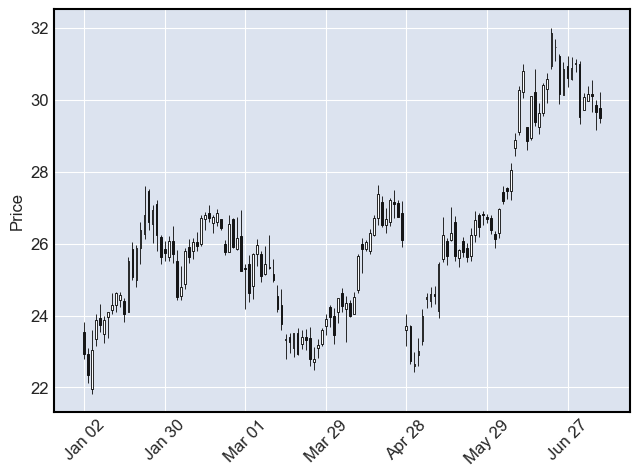

In [6]:
mpf.plot(data,type='candle')

In [8]:
# Mudando estilos do gráfico
print(mpf.available_styles())

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


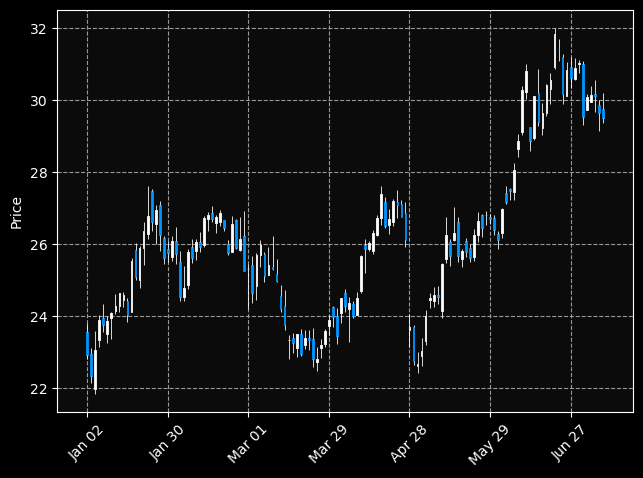

In [30]:
mpf.plot(data,type='candle', style='nightclouds')

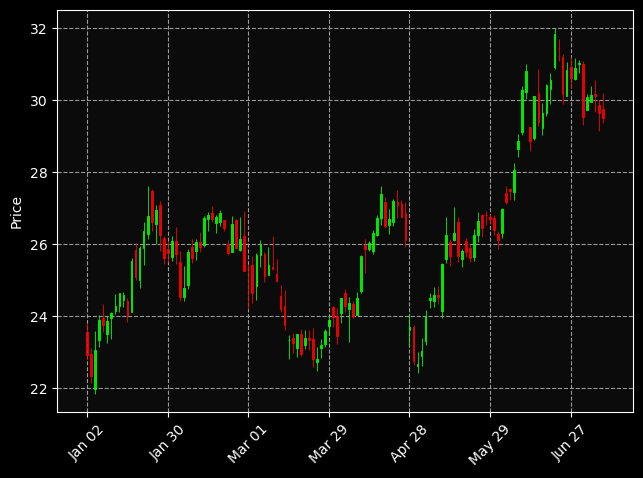

In [32]:
# Criando nosso próprio estilo

# Definindo as cores de vela positiva e negativa
cores = mpf.make_marketcolors(up='#00ff00',down='red',wick='inherit',edge='inherit',volume='in')

# Utilizando um estilo base e aplicando nossas modificações
estilo=mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=cores)

# Plotando novo gráfico
mpf.plot(data,type='candle',style=estilo)
